In [28]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [29]:
import pandas as pd

<IPython.core.display.Javascript object>

In [21]:
acr = pd.read_csv('data/acr_ifm_20201016.csv', engine='python')
car = pd.read_csv('data/car_ifm_20201016.csv')

In [50]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_id                                  143 non-null    object 
 1   arb_id                                      117 non-null    object 
 2   Cooperative/ Aggregate ID                   0 non-null      float64
 3   Project Developer                           143 non-null    object 
 4   Project Owner                               143 non-null    object 
 5   Project Name                                143 non-null    object 
 6   Offset Project Operator                     130 non-null    object 
 7   Authorized Project Designee                 120 non-null    object 
 8   Verification Body                           31 non-null     object 
 9   Project Type                                143 non-null    object 
 10  Status        

<IPython.core.display.Javascript object>

In [64]:
car.columns

Index(['project_id', 'arb_id', 'Cooperative/ Aggregate ID',
       'Project Developer', 'Project Owner', 'Project Name',
       'Offset Project Operator', 'Authorized Project Designee',
       'Verification Body', 'Project Type', 'Status', 'ARB Project Status',
       'Project Site Location', 'Project Site State', 'Project Site Country',
       'Additional Certification(s)', 'SDG Impact', 'Project Notes',
       'total_arbocs', 'Project Listed Date', 'Project Registered Date',
       'Documents', 'Data', 'Project Website', 'Unnamed: 24'],
      dtype='object')

<IPython.core.display.Javascript object>

In [73]:
def load_registry_csv(fname):
    data = pd.read_csv(fname, engine="python")
    data = data.rename(
        columns={
            "Total Number of Offset Credits Registered ": "total_arbocs",
            "Total Number of Credits Registered ": "total_arbocs",  # love different names, but both trailing space!
            "ARB ID": "arb_id",
            "Project ID": "project_id",
            "ARB Project Status": "arb_status",
            "ARB Status": "arb_status",
        }
    )
    return data

<IPython.core.display.Javascript object>

In [74]:
car = load_registry_csv("data/car_ifm_20201016.csv")

<IPython.core.display.Javascript object>

In [75]:
acr_car_status_map = {
    "Listed - Active ARB Project": "Active ARB Project",
    "Listed - Proposed Project": "Proposed Project",
    "Listed - Active Registry Project": "Active Registry Project",
    "ARB Inactive": "Inactive",
    "Not ARB Eligible": "Not ARB Eligible",
}
acr = load_registry_csv("data/acr_ifm_20201016.csv")
acr["arb_status"] = acr["arb_status"].map(acr_car_status_map)

<IPython.core.display.Javascript object>

In [79]:
all_proj_status = pd.concat(
    [
        car[["project_id", "arb_id", "arb_status", "total_arbocs"]],
        acr[["project_id", "arb_id", "arb_status", "total_arbocs"]],
    ]
)

<IPython.core.display.Javascript object>

In [93]:
with pd.option_context("display.float_format", "{:,.2f}".format):
    display(all_proj_status.groupby(["arb_status"]).project_id.nunique())

arb_status
Active ARB Project         97
Active Registry Project    21
Inactive                   38
Not ARB Eligible           64
Proposed Project           55
Terminated                  1
Name: project_id, dtype: int64

<IPython.core.display.Javascript object>

In [72]:
acr.columns

Index(['project_id', 'arb_id', 'Project Developer', 'Project Name', 'Verifier',
       'Project Type', 'Voluntary Status', 'arb_status',
       'Project Site Location', 'Project Site State', 'Project Site Country',
       'Additional Certification(s)', 'Project Notes',
       'Total Number of Credits Registered ', 'Documents', 'Project Website',
       'Unnamed: 16'],
      dtype='object')

<IPython.core.display.Javascript object>

In [40]:
acr["ARB Project Status"].value_counts()

Active ARB Project         49
Not ARB Eligible           39
Proposed Project           30
Active Registry Project     8
Inactive                    7
Name: ARB Project Status, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Project ID                                  143 non-null    object 
 1   ARB ID                                      117 non-null    object 
 2   Cooperative/ Aggregate ID                   0 non-null      float64
 3   Project Developer                           143 non-null    object 
 4   Project Owner                               143 non-null    object 
 5   Project Name                                143 non-null    object 
 6   Offset Project Operator                     130 non-null    object 
 7   Authorized Project Designee                 120 non-null    object 
 8   Verification Body                           31 non-null     object 
 9   Project Type                                143 non-null    object 
 10  Status        

<IPython.core.display.Javascript object>

In [42]:
acr[['Project ID', 'Total']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Project ID                           135 non-null    object 
 1   ARB ID                               60 non-null     object 
 2   Project Developer                    135 non-null    object 
 3   Project Name                         135 non-null    object 
 4   Verifier                             83 non-null     object 
 5   Project Type                         135 non-null    object 
 6   Voluntary Status                     41 non-null     object 
 7   ARB Status                           135 non-null    object 
 8   Project Site Location                135 non-null    object 
 9   Project Site State                   135 non-null    object 
 10  Project Site Country                 135 non-null    object 
 11  Additional Certification(s)     

<IPython.core.display.Javascript object>

In [41]:
acr[["ARB ID"]]

,ARB ID
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
130,NaN
131,NaN
132,NaN
133,NaN


<IPython.core.display.Javascript object>

In [27]:
acr['ARB Status'].value_counts().index

Index(['Listed - Active ARB Project', 'Not ARB Eligible',
       'Listed - Proposed Project', 'Listed - Active Registry Project',
       'ARB Inactive', 'Proposed Early Action'],
      dtype='object')

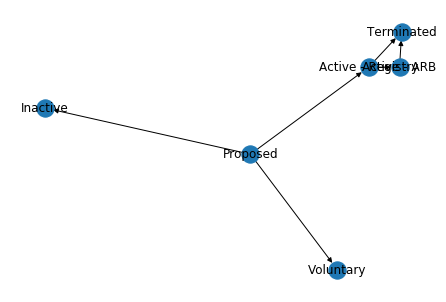

In [18]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

%matplotlib inline

G = nx.DiGraph()

states = ['Proposed', 'Voluntary', 'Inactive', 'Active - Registry', 'Active - ARB', 'Terminated']
for state in states: 
    G.add_node(state, s=150, alpha=0.2)

G.add_node("Proposed")
G.add_node("Voluntary")
G.add_node("Inactive")
G.add_edge(*("Proposed","Voluntary"))
G.add_edge(*("Proposed","Inactive"))
G.add_node("Active - Registry")
G.add_node("Active - ARB")
G.add_node('Terminated')






G.add_edge(*("Proposed","Active - Registry"))
G.add_edge(*("Active - Registry", "Active - ARB"))
G.add_edge(*("Active - Registry", "Terminated"))
G.add_edge(*("Active - ARB", "Terminated"))





pos = graphviz_layout(G, prog='dot')
nx.draw(G, with_labels=True)# connectionstyle='arc3, rad=0.1')